# Final Exercise #

- Using numpy, generate a time series of 365 days simulating how many daily visitors a park gets. There must be a trend representing a growth in popularity over time, with an overall mean of 2000 visitors and a standard deviation of 500
- Create a pandas DataFrame using dates as indices and visitors as the column
- Calculate the mean of visitors per month and the corresponding standard deviation
- Create a line graph displaying the change in daily visitors over time, then add to it the weekly moving average. Moreover, create another graph showing the monthly mean for visitors

In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [334]:
days = 365
mean = 2000
sd = 500
seed = 12345
daily_growth = 0.001  # 0.01 offers steeper visual growth in the final graph, 0.001 is more balanced

In [335]:
np.random.seed(seed)
base_distribution = np.random.normal(mean, sd, days)  # generate the base distribution
scaling_factors = np.linspace(1,1+daily_growth*(days-1),days)  # factors by which they grow over time
scaled_distribution = base_distribution*scaling_factors  # apply the growing trend
normal_scaled_distribution = (scaled_distribution-np.mean(scaled_distribution))/np.std(scaled_distribution)  # standardize
visitor_distribution = np.array([int(i) for i in (mean + normal_scaled_distribution*sd)])  # final visitor distribution with a growing trend respecting given distribution

In [336]:
print("Sample mean:",np.mean(visitor_distribution))
print("Sample standard deviation:",np.std(visitor_distribution))

Sample mean: 1999.509589041096
Sample standard deviation: 499.99597043975814


In [337]:
dictionary = {'visitors': visitor_distribution}
dataframe = pd.DataFrame(dictionary)
dataframe.head()

,visitors
0,1639
1,1915
2,1515
3,1502
4,2519


In [338]:
months = [0,31,28,31,30,31,30,31,31,30,31,30,31]
cumsum_months = np.cumsum(months)  # output: array([  0,  31,  59,  90, 120, 151, 181, 212, 243, 273, 304, 334, 365])
monthly_visitor_mean = []
monthly_visitor_sd = []
for i in range(12):
    section = dataframe['visitors'][cumsum_months[i]:cumsum_months[i+1]]
    monthly_visitor_mean.append(section.mean())
    monthly_visitor_sd.append(section.std())
for i in range(12):
    print(f"Month: {i+1}, visitor mean: {monthly_visitor_mean[i]:.3f}, visitor standard deviation: {monthly_visitor_sd[i]:.3f}")

Month: 1, visitor mean: 1868.613, visitor standard deviation: 431.676
Month: 2, visitor mean: 1628.179, visitor standard deviation: 441.926
Month: 3, visitor mean: 1838.000, visitor standard deviation: 408.915
Month: 4, visitor mean: 1910.400, visitor standard deviation: 426.088
Month: 5, visitor mean: 1914.548, visitor standard deviation: 405.858
Month: 6, visitor mean: 1996.533, visitor standard deviation: 519.040
Month: 7, visitor mean: 1999.452, visitor standard deviation: 483.899
Month: 8, visitor mean: 2025.323, visitor standard deviation: 495.601
Month: 9, visitor mean: 2038.167, visitor standard deviation: 468.744
Month: 10, visitor mean: 2107.484, visitor standard deviation: 488.462
Month: 11, visitor mean: 2317.867, visitor standard deviation: 598.866
Month: 12, visitor mean: 2322.161, visitor standard deviation: 471.461


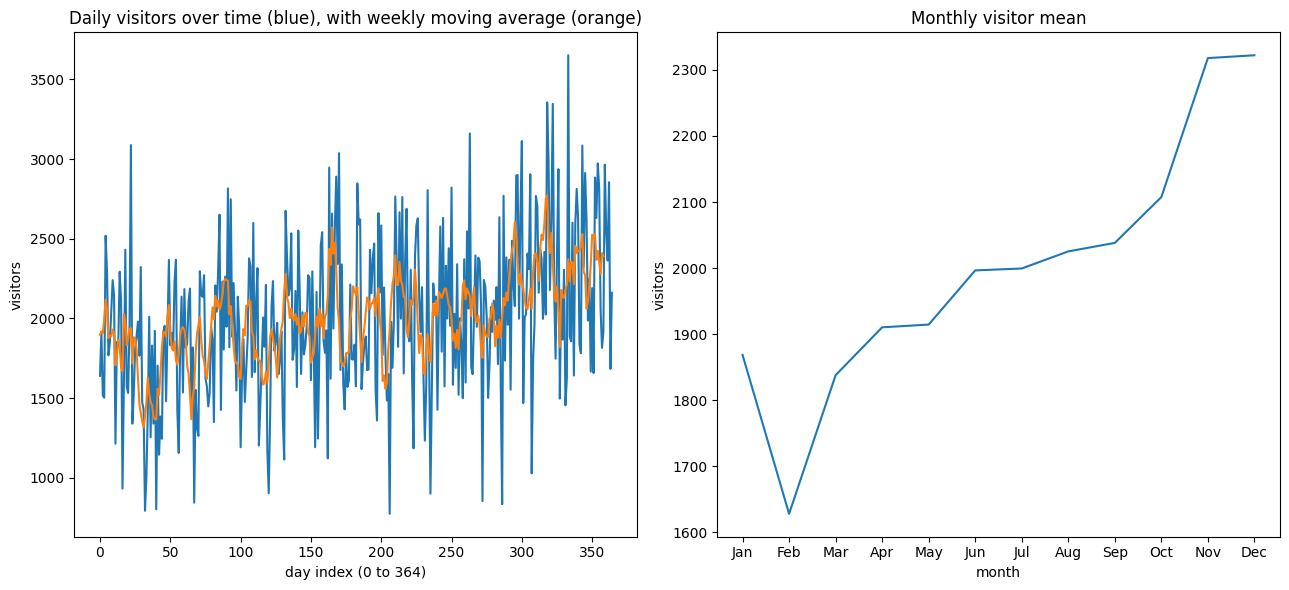

In [339]:
plt.figure(figsize=(13, 6))


window = 7  # odd for simplicity, we include the point at time t
m = int((window-1)/2)
moving_average = [visitor_distribution[index-m:index+m].mean() for index in range(m,len(visitor_distribution)-m)]

plt.subplot(1,2,1)
plt.plot(range(days), visitor_distribution)
plt.plot(range(len(moving_average)), moving_average)
plt.xticks()
plt.yticks()
plt.xlim()
plt.ylim()
plt.title("Daily visitors over time (blue), with weekly moving average (orange)")
plt.xlabel("day index (0 to 364)")
plt.ylabel("visitors")


plt.subplot(1,2,2)
plt.plot(range(12), monthly_visitor_mean)
plt.xticks(range(12), ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
plt.yticks()
plt.xlim()
plt.ylim()
plt.title("Monthly visitor mean")
plt.xlabel("month")
plt.ylabel("visitors")


plt.tight_layout()
plt.show()